## KLASTROWANIE 

https://realpython.com/k-means-clustering-python/

In [22]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd

In [2]:
features, true_labels = make_blobs(
    n_samples=2000,       #ILE wierszy
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [3]:
features.shape

(2000, 2)

In [4]:
features[:4]

array([[ 4.28640068, -3.20191519],
       [ 6.12890134,  4.06084637],
       [ 0.92442433, -1.6635897 ],
       [-7.02786553, -9.58144444]])

In [43]:
import matplotlib.pyplot as plt

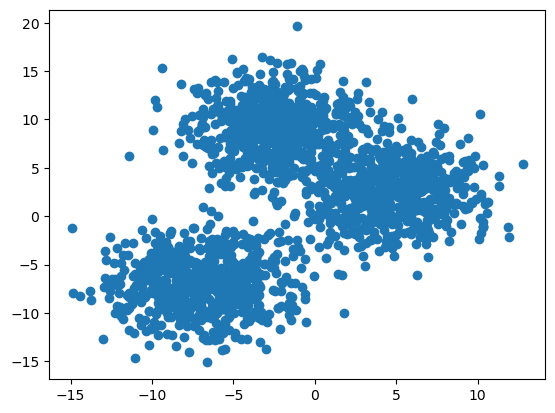

In [60]:
import matplotlib.pyplot as plt
plt.scatter(features[:,0],features[:,1],)
plt.show()

Algorytm uczenia maszynowego uznałby wagę za ważniejszą niż wzrost tylko dlatego, że wartości wagi są większe i mają większą zmienność w zależności od osoby.

Algorytmy uczenia maszynowego muszą uwzględniać wszystkie funkcje na równych zasadach. Oznacza to, że wartości dla wszystkich cech muszą zostać przekształcone do tej samej skali.

Proces przekształcania cech liczbowych w celu użycia tej samej skali jest znany jako skalowanie cech . Jest to ważny etap wstępnego przetwarzania danych w przypadku większości algorytmów uczenia maszynowego opartych na odległości, ponieważ może mieć znaczący wpływ na wydajność algorytmu.

### Sklowanie

- Standaryzacja skaluje lub przesuwa wartości dla każdej cechy liczbowej w zbiorze danych, tak aby cechy miały średnią równą 0 i odchylenie standardowe 1:

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
scaled_features[:5]

array([[ 1.0706439 , -0.65198259],
       [ 1.40841283,  0.36622872],
       [ 0.45432326, -0.43631526],
       [-1.00349791, -1.54636812],
       [ 0.02768414, -1.4884438 ]])

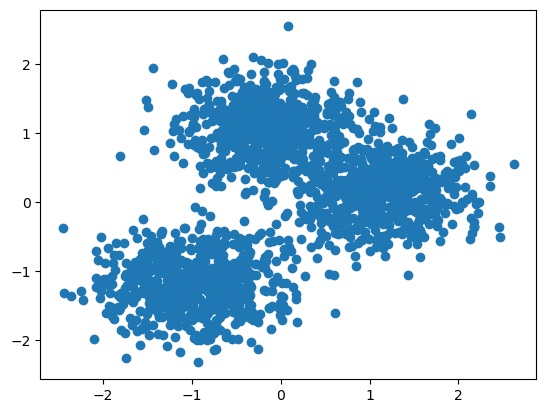

In [61]:
plt.scatter(scaled_features[:,0],scaled_features[:,1],)
plt.show()

### Kmeans

## init   
- kontroluje technikę inicjalizacji. Standardowa wersja algorytmu k -średnich jest realizowana przez ustawienie "random". Ustawienie tego na "k-means++" wykorzystuje zaawansowaną sztuczkę przyspieszającą zbieżność.

## n_clusters
 - ustawia k dla kroku grupowania. Jest to najważniejszy parametr dla k -średnich.

##n_init
 - ustawia liczbę inicjalizacji do wykonania. Jest to ważne, ponieważ dwa przebiegi mogą być zbieżne w przypadku różnych przypisań klastra. Domyślnym zachowaniem algorytmu scikit-learn jest wykonanie dziesięciu przebiegów k -średnich i zwrócenie wyników jednego z najniższym SSE.

## max_iter
 - ustawia liczbę maksymalnych iteracji dla każdej inicjalizacji algorytmu k -średnich.

In [7]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [9]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [11]:
print("The lowest SSE value:",kmeans.inertia_)

The lowest SSE value: 756.3144593140762


In [12]:
print("Final locations of the centroid:",kmeans.cluster_centers_)

Final locations of the centroid: [[-0.19114334  1.06873089]
 [ 1.15273876  0.11462703]
 [-0.97834613 -1.17848081]]


In [72]:
CEN = kmeans.cluster_centers_
CEN

array([[-0.19114334,  1.06873089],
       [ 1.15273876,  0.11462703],
       [-0.97834613, -1.17848081]])

In [13]:
print("The number of iterations required to converge:",kmeans.n_iter_)

The number of iterations required to converge: 4


Na koniec przypisania klastrów są przechowywane jako jednowymiarowa tablica NumPy 

In [15]:
kmeans.labels_

array([1, 1, 1, ..., 1, 2, 1], dtype=int32)

In [66]:
kmeans.fit_predict

<bound method _BaseKMeans.fit_predict of KMeans(init='random', n_clusters=3, random_state=42)>

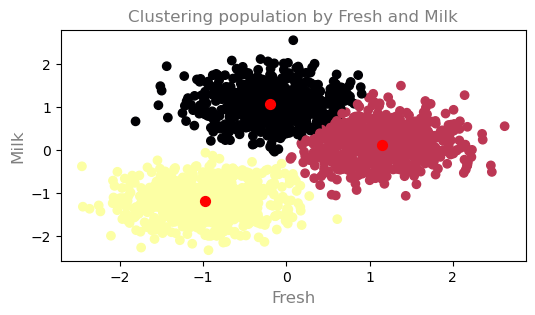

In [79]:
plt.figure(figsize=(6, 3))
plt.scatter(scaled_features[:,0],scaled_features[:,1], c=kmeans.labels_, cmap='inferno')
plt.scatter(CEN[:,0],CEN[:,1], marker='.', c='red', s=200)
plt.title('Clustering population by Fresh and Milk', fontsize=12, alpha=0.5)
plt.xlabel('Fresh', fontsize=12, alpha=0.5)
plt.ylabel('Milk', fontsize=12, alpha=0.5)
plt.show()